In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
Location = r"C:\Users\Nanda\Documents\Spring 2020\Data Visualization\amazon.csv"
df=pd.read_csv(Location, encoding='latin1')

In [2]:
lookup = {'Janeiro':'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April','Maio':'May','Junho':'June','Julho':'July',
          'Agosto':'August','Setembro':'September', 'Outubro':'October', 'Novembro' : 'November', 'Dezembro' : 'December'}
df['month_name'] = df['month'].apply(lambda x: str(lookup[x]))

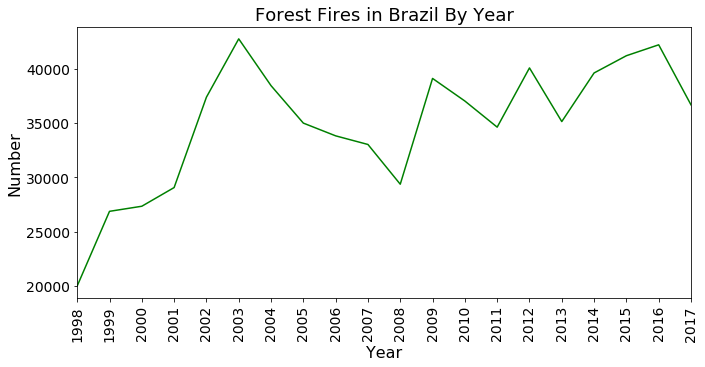

In [3]:
df_fires_groupby_year = df.groupby(['year'])[['number']].sum().reset_index()
df_fires_groupby_year.tail()
df_fires_groupby_state = df.groupby(['year','state'])[['number']].sum().reset_index()
plt.figure(figsize=(11,5))
#plot=sns.barplot(x='year',y='number', data = df_fires_groupby_year.sort_index())
plot=sns.lineplot(x = 'year', y = 'number', data = df_fires_groupby_year, estimator = 'sum', color='green' )
plt.xlabel("Year",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Forest Fires in Brazil By Year", fontsize=18)
plot.set_xlim(1998, 2017)
plot.xaxis.set_major_locator(plt.MaxNLocator(20))

Text(0.5, 1.0, 'Forest Fires By Months of the Year')

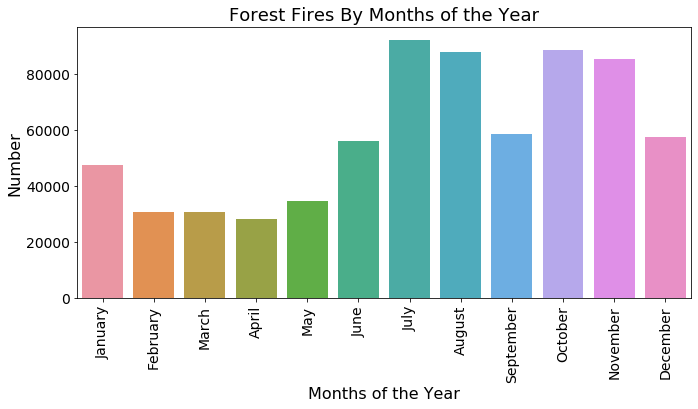

In [4]:
df_fires_month_wise = df.groupby(['month_name'])[['number']].sum().reset_index()
plt.figure(figsize=(11,5))
sns.barplot(x='month_name',y='number', data = df_fires_month_wise,order=['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])
plt.xlabel("Months of the Year",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Forest Fires By Months of the Year", fontsize=18)

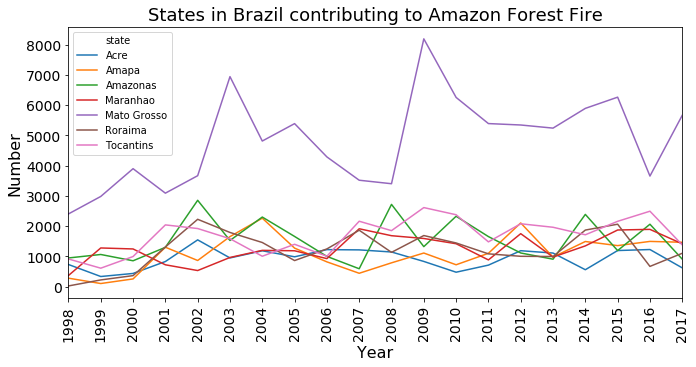

In [7]:
df_amazon_states = df.loc[df['state'].isin(['Acre','Amapa','Para','Amazonas','Roraima','Mato Grosso','Tocantins','Maranhao'])].groupby(by = ['year','state'])[['number']].sum().reset_index()
plt.figure(figsize=(11,5))
#plot=sns.barplot(x='year',y='number', data = df_fires_groupby_year.sort_index())
plot=sns.lineplot(x = 'year', y = 'number', data = df_amazon_states, estimator = 'sum', color='red', hue='state' )
plt.xlabel("Year",fontsize=16)
plt.ylabel("Number",fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("States in Brazil contributing to Amazon Forest Fire", fontsize=18)
plot.set_xlim(1998, 2017)
plot.xaxis.set_major_locator(plt.MaxNLocator(20))